# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis
-----------------

* Closer to Latitude 0 the temperature is high and away from Latitude 0, the temperatue is lesser.
* Humidity doesnt seem to have a difference whether closer to Latitude 0 or away from it.
* Cloudiness doesnt seem to have a difference whether the city is closer or away from latitude 0.
* Away from Latitude 0, there are few cities with more wind speed.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from urllib.error import HTTPError

In [48]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [27]:
#Create a dataframe to hold the city names and also write it into an output csv file

city_list = pd.DataFrame({"City" : cities})
city_list.head()
city_list.to_csv("city_list.csv")

In [6]:
# Create settings dictionary with information we're interested in
settings = {"units": "Imperial", "appid": api_key}
data = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
print("Beginning Data Retrieval")
print("-----------------------------")
i = 1
loop = 1
for city in cities:
    print(f'Processing Record {i} of Set {loop} | {city}')
    i = i + 1
    if i == 50:
        i = 1
        loop = loop + 1
    try:
        current_weather_city = owm.get_current(city, **settings)
        summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
        data.append(current_weather_city(*summary))
    except HTTPError as err:
        print(f"City not found {city}")
print("Data Retrieval Complete")
print("-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puri
Processing Record 2 of Set 1 | yoichi
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | marawi
Processing Record 6 of Set 1 | saleaula
City not found saleaula
Processing Record 7 of Set 1 | sentyabrskiy
City not found sentyabrskiy
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | seoul
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | funadhoo
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | reconquista
Processing Record 15 of Set 1 | san quintin
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | kamenskoye
City not found kamenskoye
Processing Record 20 of Set 1 | mys shmidta
City not found mys shmidta
Processing Record 21 of Set 1 

Processing Record 40 of Set 4 | salta
Processing Record 41 of Set 4 | macusani
Processing Record 42 of Set 4 | labasan
Processing Record 43 of Set 4 | aripuana
Processing Record 44 of Set 4 | swan hill
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | nueva gerona
Processing Record 47 of Set 4 | anaconda
Processing Record 48 of Set 4 | bengkulu
City not found bengkulu
Processing Record 49 of Set 4 | vila velha
Processing Record 1 of Set 5 | kilindoni
Processing Record 2 of Set 5 | bandrele
Processing Record 3 of Set 5 | katherine
Processing Record 4 of Set 5 | bull savanna
Processing Record 5 of Set 5 | ouadda
Processing Record 6 of Set 5 | atlantis
Processing Record 7 of Set 5 | asyut
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | leninsk
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | fare
Processing Record 12 of Set 5 | corsicana
Processing Record 13 of Set 5 | winnemucca
Processing Record 14 of Set 5 | atar
Processi

Processing Record 35 of Set 8 | lagos
Processing Record 36 of Set 8 | tuggurt
City not found tuggurt
Processing Record 37 of Set 8 | maumere
Processing Record 38 of Set 8 | yushu
Processing Record 39 of Set 8 | miles city
Processing Record 40 of Set 8 | angra
City not found angra
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | khipro
Processing Record 43 of Set 8 | nizhniy kuranakh
Processing Record 44 of Set 8 | virginia beach
Processing Record 45 of Set 8 | narsaq
Processing Record 46 of Set 8 | ascoli piceno
Processing Record 47 of Set 8 | gobabis
Processing Record 48 of Set 8 | waddan
Processing Record 49 of Set 8 | yanchukan
City not found yanchukan
Processing Record 1 of Set 9 | pemangkat
City not found pemangkat
Processing Record 2 of Set 9 | naryan-mar
Processing Record 3 of Set 9 | fairbanks
Processing Record 4 of Set 9 | tarko-sale
Processing Record 5 of Set 9 | necochea
Processing Record 6 of Set 9 | pacific grove
Processing Record 7 of Set 9 | agdas
P

Processing Record 21 of Set 12 | osorno
Processing Record 22 of Set 12 | tahta
City not found tahta
Processing Record 23 of Set 12 | piopio
Processing Record 24 of Set 12 | emerald
Processing Record 25 of Set 12 | houma
Processing Record 26 of Set 12 | mogzon
Processing Record 27 of Set 12 | corinto
Processing Record 28 of Set 12 | moorhead
Processing Record 29 of Set 12 | talnakh
Processing Record 30 of Set 12 | hassleholm
Processing Record 31 of Set 12 | anderson
Processing Record 32 of Set 12 | gazojak
Processing Record 33 of Set 12 | pimentel
Processing Record 34 of Set 12 | simao
Processing Record 35 of Set 12 | umm kaddadah
Processing Record 36 of Set 12 | yuza
Processing Record 37 of Set 12 | lipin bor
Processing Record 38 of Set 12 | mitsamiouli
Processing Record 39 of Set 12 | mount isa
Processing Record 40 of Set 12 | zaraza
Processing Record 41 of Set 12 | caravelas
Processing Record 42 of Set 12 | bonavista
Processing Record 43 of Set 12 | honiara
Processing Record 44 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
#Creating Dataframe and exporting into a csv file
labels = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
city_data = pd.DataFrame.from_records(data,columns=labels)
city_data.to_csv("city_weather_data.csv")

In [51]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,94,PF,1570411560,87,-23.12,-134.97,73.95,14.56
1,Tocopilla,76,CL,1570411561,85,-22.09,-70.20,58.11,7.27
2,Fairbanks,90,US,1570411502,83,64.84,-147.72,34.00,6.93
3,Ribeira Grande,93,PT,1570411561,91,38.52,-28.70,72.12,21.23
4,Albany,90,US,1570411383,82,42.65,-73.75,64.99,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

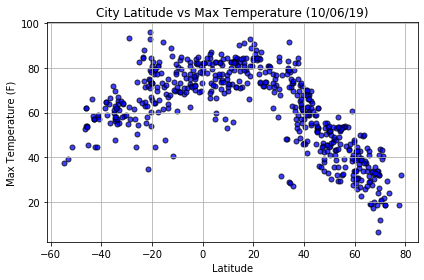

In [53]:
plt.scatter(city_data['Lat'],city_data['Max Temp'],marker = "o",facecolors='blue',edgecolors="black",
           s=25,alpha=0.75)
plt.grid()
plt.title("City Latitude vs Max Temperature (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.show()


#### Latitude vs. Humidity Plot

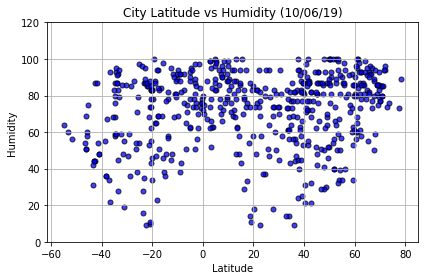

In [54]:
plt.scatter(city_data['Lat'],city_data['Humidity'],marker = "o",facecolors='blue',edgecolors="black",
           s=25,alpha=0.75)
plt.grid()
plt.title("City Latitude vs Humidity (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(0,120)
plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

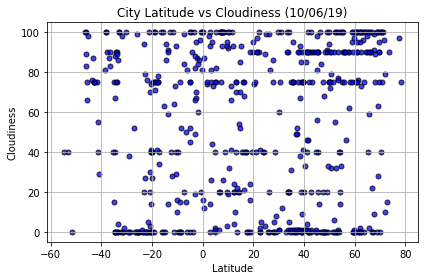

In [55]:
plt.scatter(city_data['Lat'],city_data['Cloudiness'],marker = "o",facecolors='blue',edgecolors="black",
           s=25,alpha=0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

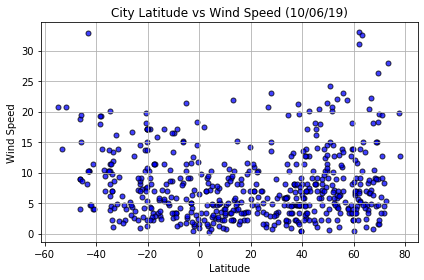

In [56]:
plt.scatter(city_data['Lat'],city_data['Wind Speed'],marker = "o",facecolors='blue',edgecolors="black",
           s=25,alpha=0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed (10/06/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.show()